(1, 2, 3)


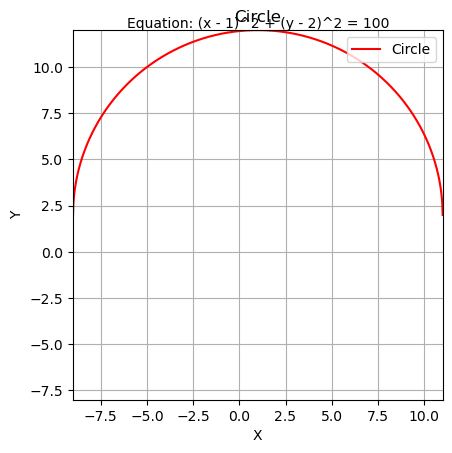

In [5]:
import numpy as np 
import matplotlib.pyplot as plt


class Point():
    
    def __init__(self, x, y, z = 0):
        self.x = x
        self.y = y
        self.z = z
        
    
    @property
    def r(self):
        self.r = np.sqrt((self.x ** 2) + (self.y ** 2) + (self.z ** 2))
        return self._r

    def __str__(self):
        return f'({self.x}, {self.y}, {self.z})'
    
    def __eq__(self, other):
        if isinstance(other, Point): return (self._r == other._r) 

    def __lt__(self, other):
        if isinstance(other, Point): return (self._r < other._r) 
    
    def __ne__(self, other):
        return not self.__eq__(other)
    
    def __gt__(self, other):
        return not self.__lt__(other) and self.__ne__(other)
    
    def __add__(self, other): #operator override
        if isinstance(other, Point):
            new_point = Point(self.x + other.x, self.y + other.y, self.z + other.z)
            return new_point
        else:
            return "The + operator cannot accept the data type of other"
    
    def __iadd__(self, other): #operator override
        if isinstance(other, Point):
            self.x += other.x
            self.y += other.y 
            self.z += other.z
            return self
        else:
            return "The + operator cannot accept the data type of other"
        
    def asdict(self):
        return {'x': self.x, 'y': self.y, 'z': self.z}

class Circle:
    def __init__(self, center, radius):
        self._radius = radius
        if radius <= 0:
            raise ValueError("Radius must be positive")
        self.center = center
        
    @property
    def radius(self):
        return self._radius
    
    @radius.setter
    def radius(self, value):
        if value <= 0:
            raise ValueError("Radius must be positive")
        self._radius = value
        
    def draw(self):
        fig, ax = plt.subplots()
        x = np.linspace(self.center.x - self.radius, self.center.x + self.radius, 1000)
        y = np.sqrt(self.radius**2 - (x - self.center.x)**2) + self.center.y
        ax.plot(x, y, 'r')
        #ax.plot(x, 2*self.center.y - y, 'r')
        ax.grid(True)
        ax.set_aspect('equal')
        ax.set_xlim([self.center.x - self.radius, self.center.x + self.radius])
        ax.set_ylim([self.center.y - self.radius, self.center.y + self.radius])
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_title('Circle')
        ax.text(self.center.x, self.center.y + self.radius + 0.1, f'Equation: (x - {self.center.x})^2 + (y - {self.center.y})^2 = {self.radius**2}', ha='center')
        ax.legend(['Circle'], loc='upper right')
        plt.show()

p1 = Point(1, 2, 3)
print(p1)

cir1 = Circle(p1, 10)
cir1.draw()